In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

In [121]:
churn_data=pd.read_csv("Churn_Modelling.csv")

In [122]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [123]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [124]:
churn_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [125]:
churn_data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [126]:
churn_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [127]:
#defining label and features
x=churn_data.drop('Exited',axis=1)

In [128]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [129]:
x['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [130]:
y=churn_data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [131]:
#Encoding
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [132]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [133]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [134]:
x=pd.concat([x,geography,gender],axis=1)

In [135]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [136]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [137]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [65]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8000
2000
8000
2000


In [67]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.fit_transform(x_test)

In [68]:
x_train

array([[-0.99063781, -1.60821099,  1.0316514 , ..., -0.58331638,
        -0.57022934, -1.08976394],
       [ 1.0759033 , -0.65555696,  0.68684812, ..., -0.58331638,
         1.75368036, -1.08976394],
       [ 1.26189199, -1.51294559, -1.03716825, ..., -0.58331638,
        -0.57022934,  0.91762992],
       ...,
       [-0.75298558, -0.75082236,  0.34204485, ..., -0.58331638,
         1.75368036,  0.91762992],
       [-0.597995  , -0.27449535, -1.38197152, ..., -0.58331638,
        -0.57022934,  0.91762992],
       [-0.15368866,  0.86868948, -1.03716825, ..., -0.58331638,
         1.75368036, -1.08976394]])

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [70]:
#initializing the ANN
model=Sequential()

In [71]:
# From Scratch
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
model.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [72]:
# Compilation
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 72        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_history=model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5956 - accuracy: 0.7117 - val_loss: 0.4871 - val_accuracy: 0.8027
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4842 - accuracy: 0.7972 - val_loss: 0.4511 - val_accuracy: 0.8065
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8035 - val_loss: 0.4303 - val_accuracy: 0.8148
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8106 - val_loss: 0.4186 - val_accuracy: 0.8183
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8134 - val_loss: 0.4080 - val_accuracy: 0.8243
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8250 - val_loss: 0.3970 - val_accuracy: 0.8338
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8343 - val_loss: 0.3854 - val_accuracy: 0.8387

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8636 - val_loss: 0.3387 - val_accuracy: 0.8607
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8655 - val_loss: 0.3369 - val_accuracy: 0.8637
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8621 - val_loss: 0.3363 - val_accuracy: 0.8641
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8658 - val_loss: 0.3375 - val_accuracy: 0.8622
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8645 - val_loss: 0.3380 - val_accuracy: 0.8641
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8653 - val_loss: 0.3361 - val_accuracy: 0.8656
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8681 - val_loss: 0.3367 - val_accuracy:

In [75]:
y_preds=model.predict(x_test)

In [76]:
y_preds

array([[0.22926003],
       [0.15640754],
       [0.08370143],
       ...,
       [0.20566383],
       [0.0633817 ],
       [0.9071106 ]], dtype=float32)

In [78]:
print(min(y_preds))
print(max(y_preds))

[0.00371894]
[1.]


In [79]:
y_preds=(y_preds>0.5)

In [80]:
len(y_test)

2000

In [81]:
len(y_preds)

2000

In [82]:
y_preds

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [86]:
#Confusion plot
from sklearn.metrics import confusion_matrix,accuracy_score
confusion=confusion_matrix(y_test,y_preds)

In [87]:
confusion

array([[1492,   74],
       [ 229,  205]], dtype=int64)

In [88]:
test_accuracy=accuracy_score(y_test,y_preds)
test_accuracy

0.8485

### LETS INCREASE THE LAYERS 

In [89]:
model=Sequential()
# From Scratch
model.add(Dense(units=20,kernel_initializer='uniform',activation='relu',input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=5,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1,kernel_initializer='glorot_normal',activation='sigmoid'))
# Compilation
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                240       
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_history=model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4787 - accuracy: 0.7951 - val_loss: 0.4143 - val_accuracy: 0.8058
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4251 - accuracy: 0.7966 - val_loss: 0.4058 - val_accuracy: 0.8058
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8149 - val_loss: 0.4014 - val_accuracy: 0.8349
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4138 - accuracy: 0.8315 - val_loss: 0.3988 - val_accuracy: 0.8353
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4108 - accuracy: 0.8328 - val_loss: 0.3973 - val_accuracy: 0.8364
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8365 - val_loss: 0.3949 - val_accuracy: 0.8368
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8354 - val_loss: 0.3997 - val_accuracy: 0.8357

Epoch 58/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3265 - accuracy: 0.8660 - val_loss: 0.3378 - val_accuracy: 0.8648
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8670 - val_loss: 0.3370 - val_accuracy: 0.8622
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8677 - val_loss: 0.3356 - val_accuracy: 0.8644
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8671 - val_loss: 0.3391 - val_accuracy: 0.8648
Epoch 62/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.8658 - val_loss: 0.3360 - val_accuracy: 0.8663
Epoch 63/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.8684 - val_loss: 0.3471 - val_accuracy: 0.8588
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8684 - val_loss: 0.3361 - val_accuracy:

In [92]:
y_preds=model.predict(x_test)

In [93]:
y_preds=(y_preds>0.5)

In [94]:
confusion=confusion_matrix(y_test,y_preds)
confusion

array([[1503,   63],
       [ 258,  176]], dtype=int64)

In [95]:
test_accuracy=accuracy_score(y_test,y_preds)
test_accuracy

0.8395

In [96]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


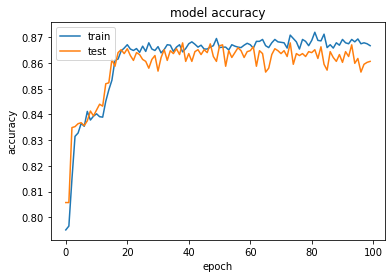

In [99]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

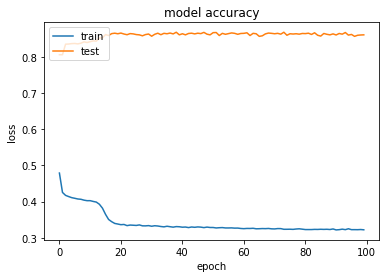

In [100]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Regression Problem and Hyperparameter Tunning of ANN

##### Keras Tuner- Decide Number of Hidden Layers And Neuron In Neural Network

Hyperparameters
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning Rate

In [104]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [106]:
pressure_data=pd.read_csv('Real_combine.csv')

In [107]:
pressure_data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [108]:
x=pressure_data.drop('PM 2.5',axis=1)

In [109]:
x

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5


In [110]:
y=pressure_data['PM 2.5']

In [111]:
y

0       219.720833
1       182.187500
2       154.037500
3       223.208333
4       200.645833
           ...    
1088    288.416667
1089    256.833333
1090    169.000000
1091    186.041667
1092    185.583333
Name: PM 2.5, Length: 1093, dtype: float64

In [112]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model 

In [113]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [114]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [117]:
tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 06s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 00m 35s
INFO:tensorflow:Oracle triggered exit


In [118]:
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 9
units_0: 480
units_1: 480
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 15
units_0: 96
units_1: 480
learning_rate: 0.001
units_2: 416
units_3: 480
units_4: 192
units_5: 384
units_6: 288
units_7: 256
units_8: 320
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 13
units_0: 192
units_1: 448
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 288
units_5: 32
units_6: 96
units_7: 448
units_8: 352
units_9: 320
units_10: 192
units_11: 192
units_12: 448
units_13: 160
units_14: 384
Score: nan
Trial summary
Hyperparameters:
num_layers: 18
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 416
units_3: 288
units_4: 352
un

### Hyperparameter with Grid Search Cv (Churn Modelling)

In [138]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [139]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [140]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [141]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [152]:
 def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [159]:
# How enumerate works
layers_z=[[1],[20,4,2],[45,5,6]]
for i, nodes in enumerate(layers_z):
    print(nodes)
for i, nodes in enumerate(layers_z):
    print(i) 

[1]
[20, 4, 2]
[45, 5, 6]
0
1
2


In [153]:
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-153-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [154]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [160]:
print(param_grid)

{'layers': [[20], [40, 20], [45, 30, 15]], 'activation': ['sigmoid', 'relu'], 'batch_size': [128, 256], 'epochs': [30]}


In [155]:
grid_result = grid.fit(x_train, y_train)

In [156]:
[grid_result.best_score_,grid_result.best_params_]

[0.8566249966621399,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [157]:
import tensorflow as tf
tf.test.gpu_device_name()

''